In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel("C:\\Users\\yajat_\\OneDrive\\Desktop\\Shad task\\demo_dataset.xlsx")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## 1.  Distribution of Car Prices

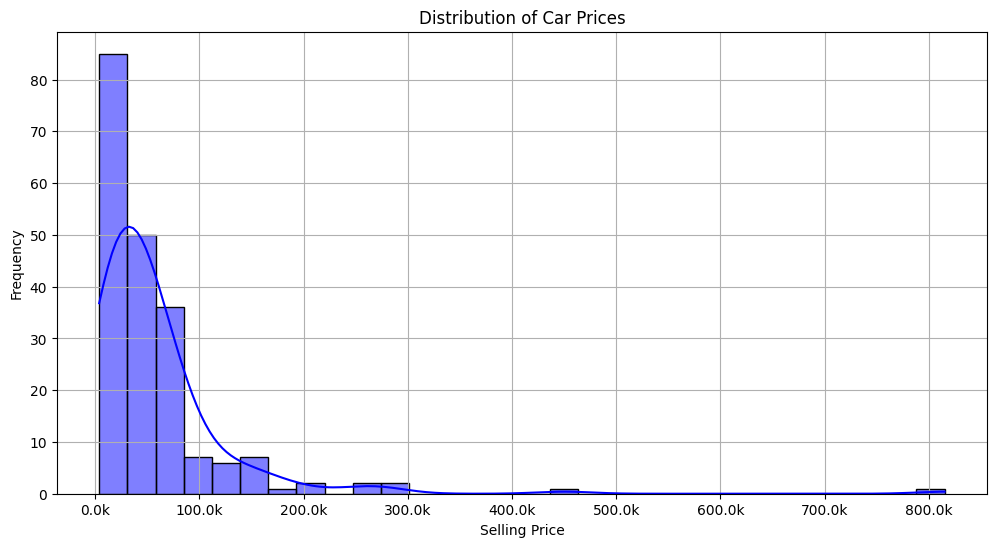

In [3]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
sns.histplot(data['selling_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid()
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/10000:.1f}k'))
plt.show()

## 2.  Scatterplot between Car Price and Mileage

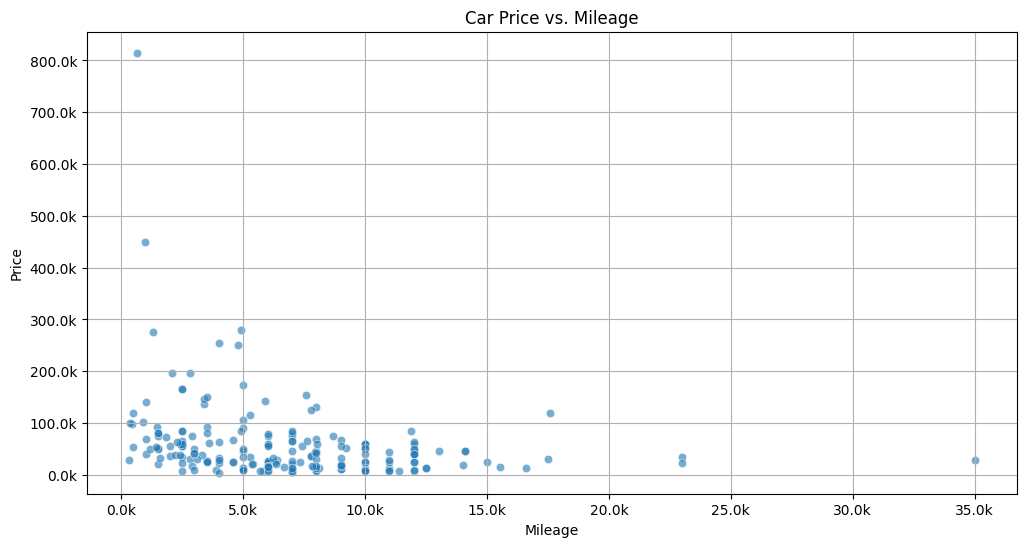

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=data, alpha=0.6)
plt.title('Car Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/10000:.1f}k'))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/10000:.1f}k'))
plt.show()

## 3.  Correlation Between Numerical Features

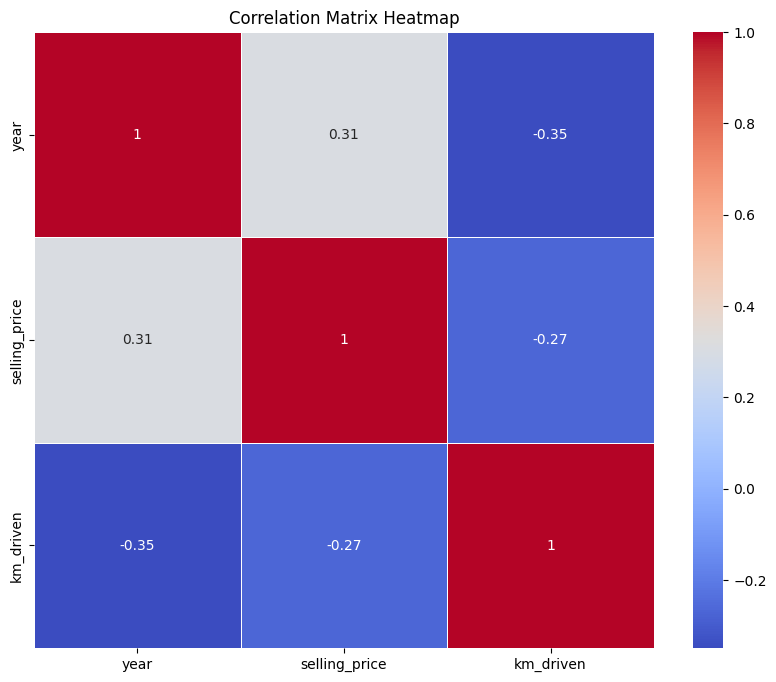

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.fillna(0)
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 4.  Cars in each price range

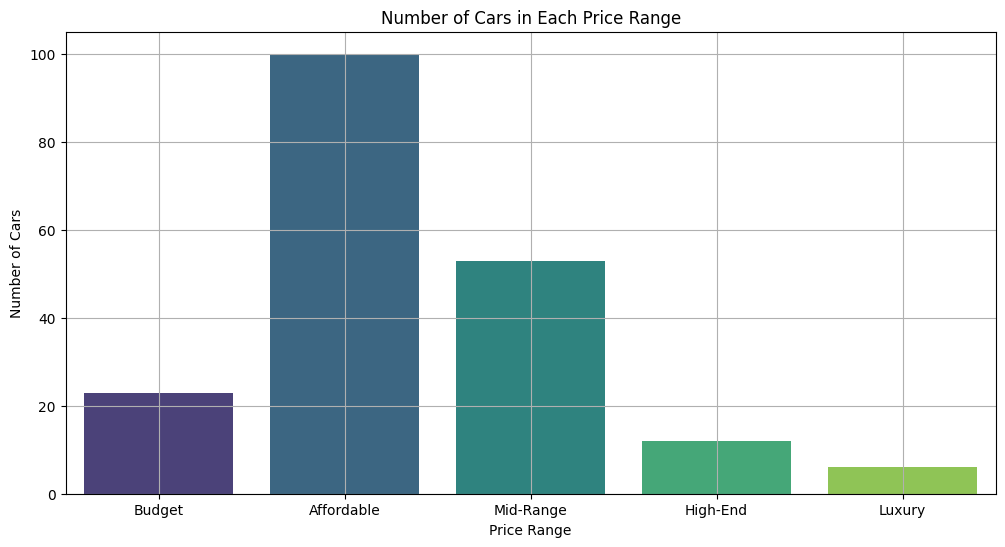

In [8]:
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

# Drop rows where 'Price' is NaN
data = data.dropna(subset=['selling_price'])

# Define bins and labels for price ranges
bins = [30000, 100000, 500000, 1000000, 1500000,2000000]
labels = ['Budget', 'Affordable', 'Mid-Range', 'High-End', 'Luxury']

# Create a new column for the price range categories
data['Price_Range'] = pd.cut(data['selling_price'], bins=bins, labels=labels)

# Plotting the count of cars in each price range
plt.figure(figsize=(12, 6))
sns.countplot(x='Price_Range', data=data, palette='viridis')
plt.title('Number of Cars in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.grid()
plt.show()